<a href="https://colab.research.google.com/github/professor91/Crypto-Trading-Strategy/blob/master/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypto Market Clustering**


The objective of this project is to find out price patterns of crypto currencies and formulate a trading strategy. In order to achieve this objective, we will be using clustering and association analysis techniques to identify any underlying trends and relationships among the various crypto currencies.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# %ls "/content/drive/MyDrive/DM_project/Datasets_5years/"

files= [
'Bitcoin Historical Data - Investing.com India.csv',
'Ethereum Historical Data - Investing.com India.csv',
'XRP Historical Data - Investing.com India.csv',
'Tether Historical Data - Investing.com India.csv',
'Dogecoin Historical Data - Investing.com India.csv',
'BNB Historical Data - Investing.com India.csv',
'Cardano Historical Data - Investing.com India.csv',
'Polygon Historical Data - Investing.com India.csv',
# 'Solana Historical Data - Investing.com India.csv',
# 'USD Coin Historical Data - Investing.com India.csv'
]

time_period = {
    'start': '2020-01-01',
    'end': '2022-12-31'
}

coins = [file_name.split()[0] for file_name in files]

# Loading Data


We will be using daily market data of the top 10 crypto currencies from January 2017 to December 2022. The data has been collected from https://in.investing.com/crypto/ and cleaned to remove any inconsistencies and missing values.

The data that we will be collecting from the website includes the following parameters:

- High: The highest price of the crypto currency for the day

- Low: The lowest price of the crypto currency for the day

- Open: The opening price of the crypto currency for the day

- Price (Close): The closing price of the crypto currency for the day

- Volume: The trading volume of the crypto currency for the day

- Change%: The percentage change in the price of the crypto currency from the previous day


In [ ]:
# loading datasets
df = {}

for file_name in files:
  df.update({
      file_name.split()[0]: pd.read_csv(f"/content/drive/MyDrive/DM_project/Datasets_5years/{file_name}", index_col='Date', parse_dates=True)
  })

In [ ]:
df

{'Bitcoin':                Price      Open      High       Low     Vol. Change %
 Date                                                                
 2022-12-31  16,537.4  16,607.2  16,635.9  16,487.3  130.44K   -0.42%
 2022-12-30  16,607.2  16,636.4  16,644.4  16,360.0  192.76K   -0.18%
 2022-12-29  16,636.4  16,546.2  16,659.1  16,496.6  181.47K    0.55%
 2022-12-28  16,546.2  16,705.9  16,781.1  16,474.2  217.96K   -0.96%
 2022-12-27  16,706.1  16,918.2  16,964.0  16,610.1  192.18K   -1.25%
 ...              ...       ...       ...       ...      ...      ...
 2017-01-05     989.3   1,135.4   1,150.6     874.5  240.01K  -12.86%
 2017-01-04   1,135.4   1,033.3   1,148.5   1,022.3  156.27K    9.88%
 2017-01-03   1,033.3   1,017.0   1,035.5   1,006.5   54.79K    1.60%
 2017-01-02   1,017.0     995.4   1,031.7     990.2   64.95K    2.17%
 2017-01-01     995.4     963.4   1,001.6     956.1   41.15K    3.33%
 
 [2191 rows x 6 columns],
 'Ethereum':                Price      Open      Hi

# Pre-Processing


In [ ]:
# replace blanks with NaN
for coin in df.keys():
  df[coin].replace('-', np.nan, inplace=True)

## Correct Data Types

The data that we will be collecting from the website includes the following parameters:

- High: float64
- Low: float64
- Open: float64
- Price: float64
- Volume: float64
- Change%: float64


In [ ]:
# checking data types
for coin in df.keys():
  print(f'{coin} - {df[coin].info()}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2022-12-31 to 2017-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2191 non-null   object
 1   Open      2191 non-null   object
 2   High      2191 non-null   object
 3   Low       2191 non-null   object
 4   Vol.      2191 non-null   object
 5   Change %  2191 non-null   object
dtypes: object(6)
memory usage: 119.8+ KB
Bitcoin - None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2022-12-31 to 2017-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2191 non-null   object
 1   Open      2191 non-null   object
 2   High      2191 non-null   object
 3   Low       2191 non-null   object
 4   Vol.      2190 non-null   object
 5   Change %  2191 non-null   object
dtypes: object(6)
memory usage: 119.8+ KB
Ethereum - None
<class 'pandas.core.frame.Dat

In [ ]:
# change data types
for coin in df.keys():
  df[coin]['Vol.'] = df[coin]['Vol.'].str.replace('.','').str.replace('M','000000').str.replace('K','000').str.replace('B', '000000000').astype(float)
  df[coin]['Change %'] = df[coin]['Change %'].str.replace('%','').str.replace(',','').astype(float)

for coin in ['Bitcoin', 'Ethereum']:
  df[coin]['Price'] = df[coin]['Price'].str.replace(',','').astype(float)
  df[coin]['Open'] = df[coin]['Open'].str.replace(',','').astype(float)
  df[coin]['High'] = df[coin]['High'].str.replace(',','').astype(float)
  df[coin]['Low'] = df[coin]['Low'].str.replace(',','').astype(float)

<ipython-input-8-3388059f735e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[coin]['Vol.'] = df[coin]['Vol.'].str.replace('.','').str.replace('M','000000').str.replace('K','000').str.replace('B', '000000000').astype(float)


## Missing Values

We have used Linear Interpolation to fill the missing values in the dataset. Linear interpolation, in the context of time series analysis, is a method for filling missing values by estimating the values that lie between two known values.

In [ ]:
# count missing values
for coin in df.keys():
  print(f'{coin} - {df[coin].isna().sum()}')

Bitcoin - Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Ethereum - Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64
XRP - Price        0
Open         0
High         0
Low          0
Vol.        12
Change %     0
dtype: int64
Tether - Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Dogecoin - Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64
BNB - Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64
Cardano - Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64
Polygon - Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [ ]:
# Fill missing values with the mean of the previous two and next two values
for coin in df.keys():
  df[coin]['Vol.'].fillna(df[coin]['Vol.'].rolling(window=5, min_periods=1, center=True).mean(), inplace=True)

## Drop records not required

Starting date and Ending date has been defined at the beginning of the notebook. Since crypto currencies launched at different times, we picked the time frame shared by all for the analysis

In [ ]:
# Reset the range for all remaining datasets
for coin in df.keys():
    df[coin] = df[coin].loc[time_period['start']:time_period['end']]

In [ ]:
for coin in df.keys():
  print(f'{coin} - {df[coin].shape[0]}')

Bitcoin - 1096
Ethereum - 1096
XRP - 1096
Tether - 1096
Dogecoin - 1096
BNB - 1096
Cardano - 1096
Polygon - 1096


In [ ]:
for coin_df in df.values():
  coin_df.sort_index(inplace=True)

## Combine into single dataset

Until now we had a dictionary which contained all the datasets as values and their respective keys as the name of the currencies. For analysis we have to combine all the datasets into one.

We have also Multi-indexed the dataset.

In [ ]:
# Create a new dataset for Price of each currency
df_price = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_price[coin] = df[coin]['Price']
    
# Create a new dataset for Price of each currency
df_open = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_open[coin] = df[coin]['Open']

# Create a new dataset for Price of each currency
df_high = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_high[coin] = df[coin]['High']

# Create a new dataset for Price of each currency
df_low = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_low[coin] = df[coin]['Low']

# Create a new dataset for Vol. of each currency
df_vol = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_vol[coin] = df[coin]['Vol.']

# Create a new dataset for Vol. of each currency
df_change = pd.DataFrame(index=df['Bitcoin'].index, columns=df.keys())
for coin in df.keys():
    df_change[coin] = df[coin]['Change %']

merged_df = pd.concat([df_price, df_open, df_high, df_low, df_vol, df_change], axis=1, join='outer', keys=['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'])
merged_df.head()

Price                                                             \
           Bitcoin Ethereum      XRP  Tether  Dogecoin    BNB Cardano Polygon   
Date                                                                            
2020-01-01  7199.8   130.75  0.19307  1.0121  0.002040  13.70  0.0335   0.015   
2020-01-02  6967.0   127.19  0.18748  1.0053  0.001999  13.03  0.0327   0.015   
2020-01-03  7343.1   134.27  0.19321  1.0039  0.002042  13.65  0.0341   0.015   
2020-01-04  7376.8   134.33  0.19311  1.0050  0.002307  13.85  0.0344   0.015   
2020-01-05  7372.5   135.59  0.19455  1.0032  0.002080  14.07  0.0346   0.015   

              Open           ...          Vol.               Change %  \
           Bitcoin Ethereum  ...       Cardano       Polygon  Bitcoin   
Date                         ...                                        
2020-01-01  7196.4   129.21  ...  2.508600e+10  5.441100e+10     0.05   
2020-01-02  7199.7   130.75  ...  2.166300e+10  6.865700e+10    -3.23   
2020-01-03  6967.1   127.19  ...  3.415900e+10  4.334000e+10     5.40   
2020-01-04  7345.1   134.30  ...  3.582000e+10  2.805100e+10     0.46   
2020-01-05  7376.8   134.32  ...  2.167100e+10  2.382600e+10    -0.06   

                                                                 
           Ethereum   XRP Tether Dogecoin   BNB Cardano Polygon  
Date                                                             
2020-01-01     1.19  0.07   0.73     1.24 -0.25    1.94    8.45  
2020-01-02    -2.72 -2.89  -0.68    -1.98 -4.85   -2.33    0.00  
2020-01-03     5.56  3.06  -0.14     2.14  4.72    4.32    0.00  
2020-01-04     0.04 -0.05   0.11    12.99  1.49    0.79    0.00  
2020-01-05     0.94  0.74  -0.18    -9.86  1.58    0.73    0.00  

[5 rows x 48 columns]

In [ ]:
merged_df.columns.levels

FrozenList([['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], ['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'Dogecoin', 'BNB', 'Cardano', 'Polygon']])

In [ ]:
# count missing values
merged_df.isna().sum()

Price     Bitcoin     0
          Ethereum    0
          XRP         0
          Tether      0
          Dogecoin    0
          BNB         0
          Cardano     0
          Polygon     0
Open      Bitcoin     0
          Ethereum    0
          XRP         0
          Tether      0
          Dogecoin    0
          BNB         0
          Cardano     0
          Polygon     0
High      Bitcoin     0
          Ethereum    0
          XRP         0
          Tether      0
          Dogecoin    0
          BNB         0
          Cardano     0
          Polygon     0
Low       Bitcoin     0
          Ethereum    0
          XRP         0
          Tether      0
          Dogecoin    0
          BNB         0
          Cardano     0
          Polygon     0
Vol.      Bitcoin     0
          Ethereum    0
          XRP         0
          Tether      0
          Dogecoin    0
          BNB         0
          Cardano     0
          Polygon     0
Change %  Bitcoin     0
          Ethere

# Trading Strategy

In [ ]:
ma = pd.DataFrame()
rsi = pd.DataFrame()

##Moving Average

In [ ]:
# Calculate n-day Moving Average
ma_n = 200
for coin in coins:
  ma[coin] = merged_df['Price'][coin].rolling(window=ma_n).mean()
ma['Bitcoin'].iloc[ma_n-1:]

Date
2020-07-18     8527.2010
2020-07-19     8537.2420
2020-07-20     8548.2190
2020-07-21     8558.4400
2020-07-22     8569.1245
                 ...    
2022-12-27    19898.7470
2022-12-28    19839.4610
2022-12-29    19789.6115
2022-12-30    19760.4075
2022-12-31    19732.3080
Name: Bitcoin, Length: 897, dtype: float64

##RSI

In [ ]:
for coin in coins:
  # Calculate RSI
  delta = merged_df['Price'][coin].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  rs = avg_gain / avg_loss
  rsi[coin] = 100 - (100 / (1 + rs))

rsi['Bitcoin'].iloc[ma_n-1:]
# rsi

Date
2020-07-18    51.554899
2020-07-19    55.591758
2020-07-20    40.435442
2020-07-21    56.163740
2020-07-22    54.117531
                ...    
2022-12-27    29.492524
2022-12-28    27.326804
2022-12-29    35.049233
2022-12-30    49.344876
2022-12-31    42.655800
Name: Bitcoin, Length: 897, dtype: float64

##Signal

In [ ]:
signal = pd.DataFrame(index=ma.index[ma_n-1:])

def trading_signal():
  for coin in coins:
    signal[coin] = np.where(
                            (rsi[coin].iloc[ma_n-1:] < 30) & (merged_df['Price'][coin].iloc[ma_n-1:] > ma[coin].iloc[ma_n-1:]), 
                            'buy', 
                            np.nan
                            )
    signal[coin] = np.where(
                            (rsi[coin].iloc[ma_n-1:] > 70) & (merged_df['Price'][coin].iloc[ma_n-1:] < ma[coin].iloc[ma_n-1:]), 
                            'sell', 
                            signal[coin]
                            )

trading_signal()
signal

,Bitcoin,Ethereum,XRP,Tether,Dogecoin,BNB,Cardano,Polygon
Date,,,,,,,,
2020-07-18,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-19,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-20,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-21,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-22,nan,nan,nan,nan,buy,nan,nan,nan
...,...,...,...,...,...,...,...,...
2022-12-27,nan,nan,nan,nan,buy,nan,nan,buy
2022-12-28,nan,nan,nan,nan,nan,nan,nan,nan
2022-12-29,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
print('Frequency of sell indicators')
for coin in coins:
  print(f'{coin}: {signal[coin].value_counts()["sell"]}')

Frequency of sell indicators
Bitcoin: 38
Ethereum: 39
XRP: 24
Tether: 4
Dogecoin: 18
BNB: 30
Cardano: 19
Polygon: 15


In [ ]:
print('Frequency of buy indicators')
for coin in coins:
  print(f'{coin}: {signal[coin].value_counts()["buy"]}')

Frequency of buy indicators
Bitcoin: 18
Ethereum: 11
XRP: 10
Tether: 1
Dogecoin: 56
BNB: 16
Cardano: 23
Polygon: 40


In [ ]:
signal[signal[coin].isin(['buy'])].index

DatetimeIndex(['2020-07-27', '2020-07-28', '2020-07-29', '2020-08-03',
               '2020-09-09', '2020-09-12', '2020-09-13', '2020-09-14',
               '2021-03-25', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-29', '2021-07-01', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-11-11', '2021-11-16', '2021-11-17',
               '2021-11-18', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-28', '2022-01-29', '2022-01-31', '2022-02-01',
               '2022-11-24', '2022-11-25', '2022-12-16', '2022-12-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Features

In [ ]:
crypto_open = np.array(merged_df['Open']).T
crypto_close = np.array(merged_df['Price']).T

In [ ]:
movements = crypto_close-crypto_open
movements

array([[ 3.400e+00, -2.327e+02,  3.760e+02, ...,  9.020e+01, -2.920e+01,
        -6.980e+01],
       [ 1.540e+00, -3.560e+00,  7.080e+00, ...,  1.085e+01, -1.040e+00,
        -4.330e+00],
       [ 1.400e-04, -5.580e-03,  5.720e-03, ..., -1.384e-02,  3.090e-03,
        -6.440e-03],
       ...,
       [-3.000e-02, -6.700e-01,  6.300e-01, ...,  1.900e+00, -5.000e-01,
         3.000e-01],
       [ 7.000e-04, -8.000e-04,  1.400e-03, ..., -4.300e-03,  1.800e-03,
        -1.000e-04],
       [ 1.000e-03,  0.000e+00,  0.000e+00, ..., -6.000e-03, -1.600e-02,
        -3.000e-03]])

In [ ]:
sum_of_movements = np.sum(movements,1)
sum_of_movements

array([ 8.91910e+03,  1.01295e+03,  1.35090e-01, -7.77000e-02,
        6.36180e-02,  2.30210e+02,  2.76100e-01,  7.01000e-01])

In [ ]:
for i in range(len(files)):
 print('coin:{}, Change:{}'.format(merged_df['High'].columns[i], sum_of_movements[i]))

coin:Bitcoin, Change:8919.100000000071
coin:Ethereum, Change:1012.9499999999978
coin:XRP, Change:0.1350899999999995
coin:Tether, Change:-0.07770000000000288
coin:Dogecoin, Change:0.06361800000000029
coin:BNB, Change:230.20999999999918
coin:Cardano, Change:0.276099999999998
coin:Polygon, Change:0.701


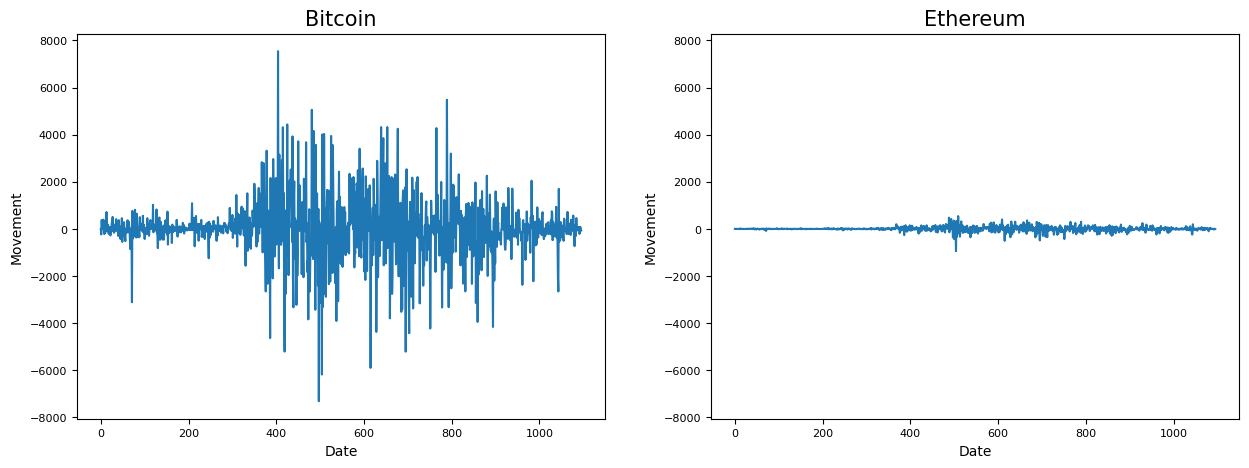

In [ ]:
compare = ['Bitcoin', 'Ethereum']

plt.figure(figsize = (15,5)) 

ax1 = plt.subplot(1,2,1)
plt.title(compare[0],fontsize = 15)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.plot(movements[merged_df['Price'].columns.get_loc(compare[0])])

plt.subplot(1,2,2,sharey = ax1)
plt.title(compare[1],fontsize = 15)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.plot(movements[merged_df['Price'].columns.get_loc(compare[1])])

## Normalize

In [ ]:
pd.DataFrame(movements.T).describe().loc[['min', 'max']]

,0,1,2,3,4,5,6,7
min,-7310.3,-940.53,-0.52885,-0.0110,-0.145905,-173.15,-0.5338,-0.827
max,7542.1,545.49,0.35522,0.0102,0.182923,137.00,0.4164,0.723


In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer() # Define a Normalizer

norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [ ]:
pd.DataFrame(norm_movements.T).describe().loc[['min', 'max']]

,0,1,2,3,4,5,6,7
min,-0.172947,-0.278652,-0.343611,-0.381694,-0.258594,-0.317404,-0.265452,-0.318692
max,0.178430,0.161613,0.230798,0.353934,0.324203,0.251137,0.207070,0.278615


In [ ]:
sum_of_norm_movements = np.sum(norm_movements,1)
sum_of_norm_movements

for i in range(len(files)):
 print('coin:{}, Change:{}'.format(merged_df['High'].columns[i], sum_of_norm_movements[i]))

coin:Bitcoin, Change:0.21100739165865207
coin:Ethereum, Change:0.30010764596511297
coin:XRP, Change:0.08777232239090191
coin:Tether, Change:-2.6961456923103038
coin:Dogecoin, Change:0.11275301137912253
coin:BNB, Change:0.4220017430160706
coin:Cardano, Change:0.13730105718107444
coin:Polygon, Change:0.27013688052749574


<ipython-input-33-dac08f733b90>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1,sharey = ax1)


Error in callback <function _draw_all_if_interactive at 0x7f760c2c9700> (for post_execute):


AttributeError: ignored

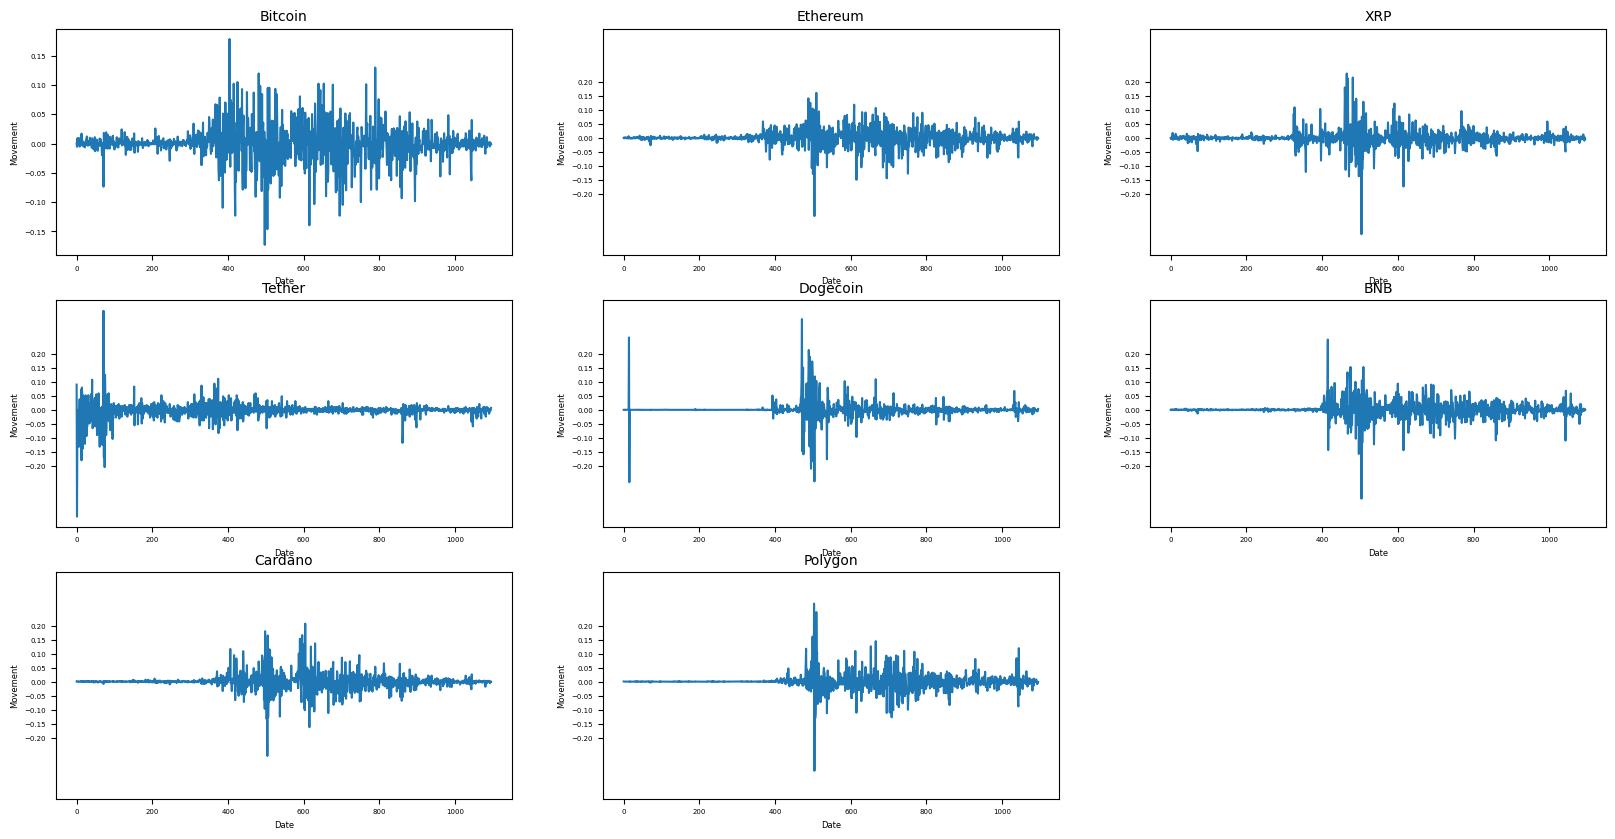

In [ ]:
plt.figure(figsize = (20,10)) 

ax1 = plt.subplot(3,3,1)

for i in range(len(coins)):
  plt.subplot(3,3,i+1,sharey = ax1)
  plt.title(coins[i],fontsize = 10)
  plt.xticks(fontsize = 5)
  plt.yticks(fontsize = 5)
  plt.xlabel('Date',fontsize = 6)
  plt.ylabel('Movement',fontsize = 6)
  plt.plot(norm_movements[i])

In [ ]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.3816937273540794
0.3539341835465128
-0.000131736500934292


# Clustering

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

##K-means

In [ ]:
# Import the necessary packages
from sklearn.cluster import KMeans

# Define a normalizer
normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters=5,max_iter = 10000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(norm_movements)
k_predictions = pipeline.predict(norm_movements)
k_predictions

df_k = pd.DataFrame({'cluster':k_predictions, 'coins':df.keys()})
df_k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,coins
0,0,Bitcoin
1,0,Ethereum
2,1,XRP
3,2,Tether
4,3,Dogecoin
5,0,BNB
6,1,Cardano
7,4,Polygon


##DBSCAN

In [ ]:
# Import the necessary packages
from sklearn.cluster import DBSCAN

# Define a normalizer
normalizer = Normalizer()

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

pipeline.fit(norm_movements)
d_predictions = pipeline.predict(norm_movements)
d_predictions

df_d = pd.DataFrame({'cluster':d_predictions, 'coins':df.keys()})
df_d

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,coins
0,1,Bitcoin
1,1,Ethereum
2,4,XRP
3,2,Tether
4,0,Dogecoin
5,1,BNB
6,4,Cardano
7,3,Polygon


##Hierarchical Clustering

In [ ]:
# Import the necessary packages
from sklearn.cluster import AgglomerativeClustering

# Define a normalizer
normalizer = Normalizer()

# Create Hierarchical Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)


pipeline.fit(norm_movements)
h_predictions = pipeline.predict(norm_movements)
h_predictions

df_h = pd.DataFrame({'cluster':h_predictions, 'coins':df.keys()})
df_h

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,coins
0,2,Bitcoin
1,2,Ethereum
2,0,XRP
3,1,Tether
4,3,Dogecoin
5,2,BNB
6,0,Cardano
7,4,Polygon


#Backtesting

In [ ]:
basket = {cluster: list(df_k.loc[df_k['cluster'] == cluster, 'coins']) for cluster in set(df_k['cluster'])}
basket

{0: ['Bitcoin', 'Ethereum', 'BNB'],
 1: ['XRP', 'Cardano'],
 2: ['Tether'],
 3: ['Dogecoin'],
 4: ['Polygon']}

In [ ]:
import random

def backtest(trade_in):
    print(trade_in)
    
    coins = trade_in
    amount = 1000
    position_size = amount / 5
    unit = {}
    
    for coin in coins:
      unit[coin] = 0
    
    for date in signal.index:
      sig = {}
      open = {}
      close = {}
      for coin in coins:
        sig[coin] = signal[coin][date]
        open[coin] = merged_df['Open'][coin].loc[date]
        close[coin] = merged_df['Price'][coin].loc[date]
        
        if sig[coin] == 'buy' and amount-position_size > 0:
          bought = position_size/open[coin]
          unit[coin] += position_size/open[coin]
          amount -= position_size
          print(f'date: {date}, signal: {sig[coin]}, coin: {coin}, open: {open[coin]}, total_unit: {unit}, invested_amount: {position_size}, remaining_amount: {amount}')
        
        if sig[coin] == 'sell' and unit[coin] > 0:
          sold = unit[coin] * close[coin]
          amount += unit[coin] * close[coin]
          unit[coin] = 0
          print(f'date: {date}, signal: {sig[coin]}, coin: {coin}, close: {close[coin]}, total_unit: {unit}, profit: {sold}, remaining_amount: {amount}')

    for coin in unit.keys():
      if unit[coin] != 0:
        unit[coin]
    
    return int(amount)

trading_in = [random.choice(basket[key]) for key in basket]
# trading_in = ['Ethereum']
backtest(trading_in)

['Ethereum', 'Cardano', 'Tether', 'Dogecoin', 'Polygon']
date: 2020-07-22 00:00:00, signal: buy, coin: Dogecoin, open: 0.0033, total_unit: {'Ethereum': 0, 'Cardano': 0, 'Tether': 0, 'Dogecoin': 60606.06060606061, 'Polygon': 0}, invested_amount: 200.0, remaining_amount: 800.0
date: 2020-07-27 00:00:00, signal: buy, coin: Polygon, open: 0.021, total_unit: {'Ethereum': 0, 'Cardano': 0, 'Tether': 0, 'Dogecoin': 60606.06060606061, 'Polygon': 9523.809523809523}, invested_amount: 200.0, remaining_amount: 600.0
date: 2020-07-28 00:00:00, signal: buy, coin: Polygon, open: 0.021, total_unit: {'Ethereum': 0, 'Cardano': 0, 'Tether': 0, 'Dogecoin': 60606.06060606061, 'Polygon': 19047.619047619046}, invested_amount: 200.0, remaining_amount: 400.0
date: 2020-07-29 00:00:00, signal: buy, coin: Polygon, open: 0.02, total_unit: {'Ethereum': 0, 'Cardano': 0, 'Tether': 0, 'Dogecoin': 60606.06060606061, 'Polygon': 29047.619047619046}, invested_amount: 200.0, remaining_amount: 200.0
date: 2020-11-21 00:00:0

27658

#Validation

##Association

In [ ]:
!pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_change.head()

,Bitcoin,Ethereum,XRP,Tether,Dogecoin,BNB,Cardano,Polygon
Date,,,,,,,,
2020-01-01,0.05,1.19,0.07,0.73,1.24,-0.25,1.94,8.45
2020-01-02,-3.23,-2.72,-2.89,-0.68,-1.98,-4.85,-2.33,0.00
2020-01-03,5.40,5.56,3.06,-0.14,2.14,4.72,4.32,0.00
2020-01-04,0.46,0.04,-0.05,0.11,12.99,1.49,0.79,0.00
2020-01-05,-0.06,0.94,0.74,-0.18,-9.86,1.58,0.73,0.00


In [ ]:
records = []
for i in df_change.index:
  transaction = []

  for coin in df_change.columns:
    if df_change.loc[i, coin] > 0:
      transaction.append(coin)

  records.append(transaction)

In [ ]:
from efficient_apriori import apriori

itemsets, rules = apriori(records, min_support=0.3, min_confidence=0.90)

print(f"Itemsets: {len(itemsets)}, Rules: {len(rules)}")

Itemsets: 5, Rules: 44


In [ ]:
conf = {}
for coin in coins:
    conf[coin] = {coin: 0 for coin in coins}
for rule in rules:
  for i in range(len(rule.lhs)):
    for j in range(len(rule.rhs)):
      conf[rule.lhs[i]][rule.rhs[j]] += 1


conf = {key: {inner_key: inner_value for inner_key, inner_value in value.items() if inner_value != 0} for key, value in conf.items()}



{0: ['Bitcoin', 'Ethereum', 'XRP', 'BNB', 'Cardano', 'Polygon'],
 1: ['Tether'],
 2: ['Dogecoin']}

{0: ['Tether'],
 1: ['Bitcoin', 'Ethereum', 'BNB', 'Polygon'],
 2: ['Dogecoin'],
 3: ['XRP', 'Cardano']}

{0: ['XRP', 'Cardano'],
 1: ['Tether'],
 2: ['Dogecoin'],
 3: ['Bitcoin', 'Ethereum', 'BNB'],
 4: ['Polygon']}

conf

{'Bitcoin': {'Ethereum': 12, 'XRP': 1, 'BNB': 3, 'Cardano': 4},
 'Ethereum': {'Bitcoin': 8, 'XRP': 2, 'BNB': 4, 'Cardano': 4},
 'XRP': {'Bitcoin': 6, 'Ethereum': 10, 'BNB': 1, 'Cardano': 4},
 'Tether': {},
 'Dogecoin': {'Bitcoin': 5, 'Ethereum': 7, 'XRP': 3, 'BNB': 2, 'Cardano': 4},
 'BNB': {'Bitcoin': 5, 'Ethereum': 11, 'XRP': 1, 'Cardano': 3},
 'Cardano': {'Bitcoin': 6, 'Ethereum': 10, 'XRP': 2, 'BNB': 3},
 'Polygon': {'Ethereum': 4}}

###Association Validation Reasoning

`conf` dictionary shows how many times a currency impacted other currencies.

- **Tether** and **Polygon** neither impacted other currencies nor got impacted by other currencies, therefore they are clustered with none.

- **Doge** affected prices of other currencies but no other currency impacted it, therefore it is also clustered with none.

- **Bitcoin**, **Ethereum**, **Cardano**, **BNB** and **XRP** impact each other, hence they are clustered together when we made only 3 clusters.

- As we increased number of clusters **XRP** and **Cardano** got clustered separatly, since **Cardano** impacts **XRP** highest among the other 3.


##Correlation

In [ ]:
import seaborn as sns

{0: ['Bitcoin', 'Ethereum', 'XRP', 'BNB', 'Cardano', 'Polygon'],
 1: ['Tether'],
 2: ['Dogecoin']}

{0: ['Tether'],
 1: ['Bitcoin', 'Ethereum', 'BNB', 'Polygon'],
 2: ['Dogecoin'],
 3: ['XRP', 'Cardano']}

{0: ['XRP', 'Cardano'],
 1: ['Tether'],
 2: ['Dogecoin'],
 3: ['Bitcoin', 'Ethereum', 'BNB'],
 4: ['Polygon']}

df_change.corr()
# sns.heatmap(df_change.corr())

,Bitcoin,Ethereum,XRP,Tether,Dogecoin,BNB,Cardano,Polygon
Bitcoin,1.000000,0.825945,0.588834,-0.185040,0.021627,0.680341,0.672112,0.599914
Ethereum,0.825945,1.000000,0.619851,-0.164823,0.020748,0.695259,0.724916,0.657947
XRP,0.588834,0.619851,1.000000,-0.118209,0.013285,0.543573,0.575599,0.516430
Tether,-0.185040,-0.164823,-0.118209,1.000000,0.064461,-0.141563,-0.113701,-0.084193
Dogecoin,0.021627,0.020748,0.013285,0.064461,1.000000,0.043501,0.032411,0.026995
BNB,0.680341,0.695259,0.543573,-0.141563,0.043501,1.000000,0.615189,0.627949
Cardano,0.672112,0.724916,0.575599,-0.113701,0.032411,0.615189,1.000000,0.621732
Polygon,0.599914,0.657947,0.516430,-0.084193,0.026995,0.627949,0.621732,1.000000


###Correlation Validation Reasoning

- **Tether**, **Doge** are lest correlated to any other currency so they, therefore they are clustered with none.

- **Bitcoin** is highly correlated with **Ethereum**, **BNB**, therefore they are clustered together


- **XRP** is less correlated with **Ethereum**, **Bitcoin**, **BNB** hence not in their cluster.

- **Polygon** is relatively less correlated with other currencies so given the chance it was clustered separately in n=5 clustering.

# EDA

In [ ]:
compare = ['Bitcoin', 'Ethereum']

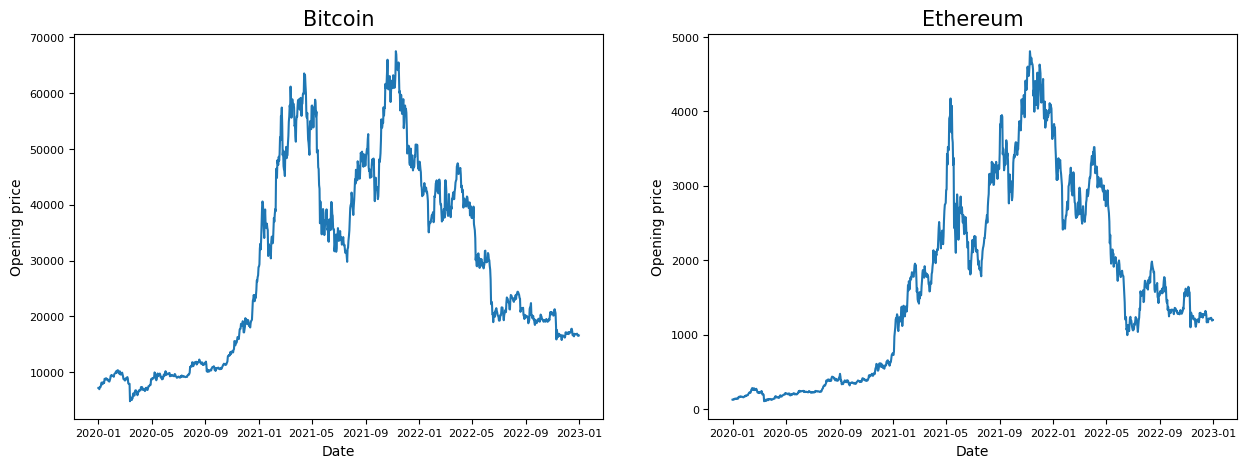

In [ ]:
plt.figure(figsize = (15,5)) 
plt.subplot(1,2,1) 

plt.title(compare[0],fontsize = 15)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Opening price',fontsize = 10)
plt.plot(merged_df['Open'][compare[0]])
plt.subplot(1,2,2) 

plt.title(compare[1],fontsize = 15)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Opening price',fontsize = 10)
plt.plot(merged_df['Open'][compare[1]])

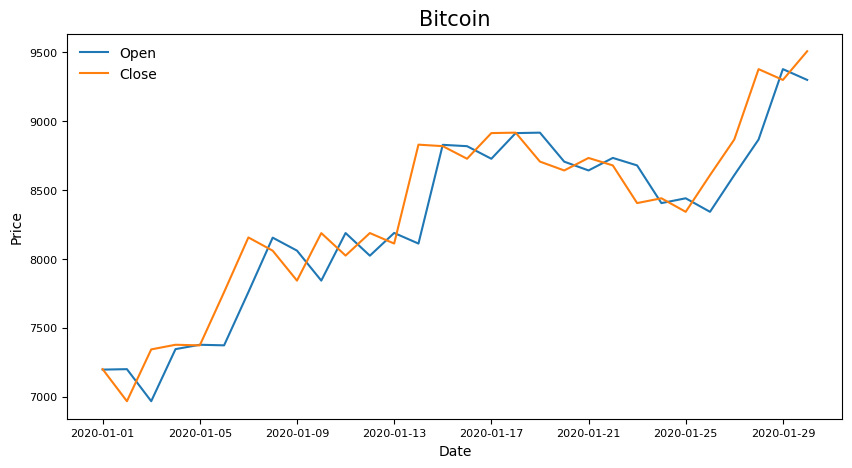

In [ ]:
plt.figure(figsize = (10,5))
plt.title(compare[0],fontsize = 15)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.plot(merged_df.iloc[0:30]['Open'][compare[0]],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(merged_df.iloc[0:30]['Price'][compare[0]],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 10}) # Properties of legend box

In [ ]:
# for key in conf:
#     sub_dict = conf[key]
#     max_value = max(sub_dict.values())
#     for sub_key in list(sub_dict.keys()):
#         if sub_dict[sub_key] < max_value or sub_dict[sub_key] == 0:
#             del sub_dict[sub_key]

# print(rules[0])
# print(rules[0].confidence)